<a href="https://colab.research.google.com/github/kabeerbora/bop_britain/blob/main/drain_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Drain_gain.xlsx to Drain_gain.xlsx


In [ ]:
import io
import pandas as pd
df = pd.read_excel(io.BytesIO(uploaded['Drain_gain.xlsx']), sheet_name='bop_%')
df

,year,BOP,GDP,%GDP,Unnamed: 4,%GDP_1
0,1800,-6.379051,304.230102,-2.096785,NaN,NaN
1,1801,-8.338858,325.732869,-2.560030,NaN,NaN
2,1802,7.024391,272.739974,2.575490,NaN,NaN
3,1803,-4.532336,264.449730,-1.713874,NaN,NaN
4,1804,-3.446979,279.643848,-1.232632,NaN,NaN
...,...,...,...,...,...,...
109,1909,-155.200000,1856.259326,-8.360901,3279.3,176.661739
110,1910,-144.100000,1929.491311,-7.468290,3450.3,178.819152
111,1911,-123.300000,2012.043790,-6.128097,3659.6,181.884709
112,1912,-145.700000,2099.650394,-6.939250,3864.5,184.054451


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['%GDP ']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('%GDP ')

In [ ]:
df_1 = pd.read_excel('/content/Drain_gain.xlsx', sheet_name='export_share')

,year,country,export_share
0,1828,Britain,48.2
1,1828,China,25.4
2,1828,Arab,7.2
3,1828,Penang,5.3
4,1828,France,5.8
5,1828,ROW,15.3
6,1837,Britain,39.5
7,1837,China,37.8
8,1837,Arab,8.4
9,1837,Penang,5.1


In [ ]:
df_1['Total_Export_Share'] = df_1.groupby('year')['export_share'].transform('sum')
df_1['Country_Export_Share'] = df_1['export_share'] / df_1['Total_Export_Share']

In [ ]:
import altair as alt


chart = alt.Chart(df_1).mark_area().encode(
    alt.X('year:O', axis=alt.Axis(title='Year')),
    alt.Y('Country_Export_Share:Q', stack='normalize', axis=alt.Axis(title='Indian Export Shares')),
    alt.Color('country:N', legend=alt.Legend(title='Country'))
).properties(
    width=600,
    height=400,
    title='Country Export Share Over Time'
).configure_legend(
    labelLimit=0,
    titleFontSize=16,
    labelFontSize=14
).configure_view(
    strokeWidth=0
).configure_axis(
    labelFontSize=14,
    titleFontSize=16,
    grid=False
).configure_title(
    fontSize=20
)

chart.display()

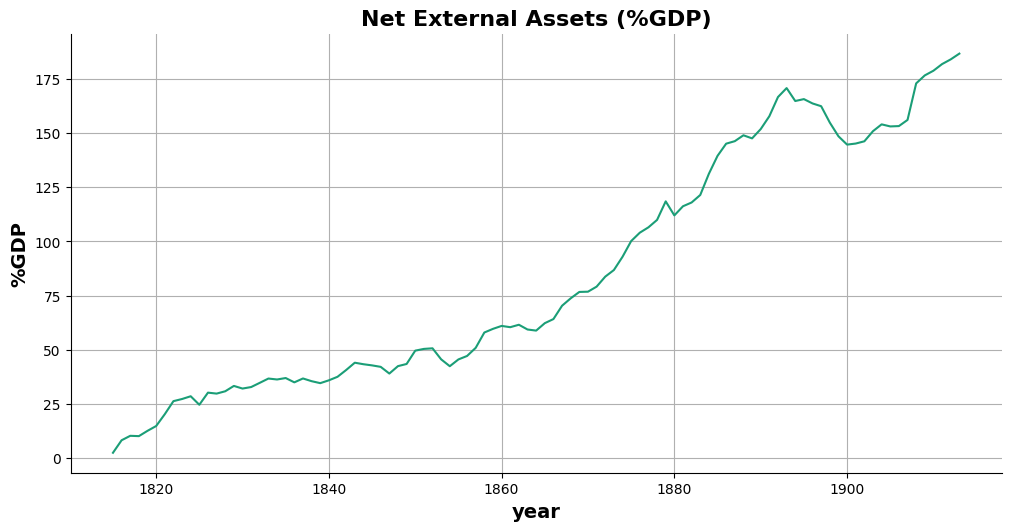

In [ ]:
df = pd.read_excel('/content/Drain_gain.xlsx', sheet_name='bop_%')
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['%GDP_1']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)

# Add grid
plt.grid(True)

# Make labels bold
plt.xlabel('year', fontsize=14, fontweight='bold')
plt.ylabel('%GDP', fontsize=14, fontweight='bold')
plt.title('Net External Assets (%GDP)', fontsize=16, fontweight='bold')

plt.show()

In [ ]:
df_2 = pd.read_excel('/content/Drain_gain (1).xlsx', sheet_name='Drain%ofProfits')
df_2

,year,profit,drain%
0,1785,42.498337,2.588337
1,1823,98.426233,4.063957
2,1858,177.784282,4.209596
3,1901,509.142808,3.336588


In [ ]:

bar_chart = alt.Chart(df_2).mark_bar().encode(
    x='year:O',
    y=alt.Y('drain%:Q', title='Drain %'),
    color=alt.Color('year:N', scale=alt.Scale(scheme='viridis'), legend=None)  # Remove legend
)
# Create a line chart for profit on a secondary y-axis
line_chart = alt.Chart(df_2).mark_line(color='red').encode(
    x='year:O',
    y=alt.Y('profit:Q', title='Profit (mil £)', axis=alt.Axis(orient='right'))
)
# Combine the charts using layer() and resolve scales for y-axes
chart = alt.layer(bar_chart, line_chart).resolve_scale(y='independent').properties(
    title='Drain (as a % of Profits)',
    width=400,  # Increase width
    height=200  # Increase height
).configure_legend(
    labelFontSize=12,  # Adjust font size if needed
    titleFontSize=14  # Adjust font size if needed
)

# Add a legend entry for the red line
chart = chart.resolve_legend(color="independent")
chart = chart + alt.Chart().mark_text(align='left', baseline='middle').encode(
    x=alt.value(10),  # Adjust x position of the text
    y=alt.value(10),  # Adjust y position of the text
    text=alt.value('Red Line: Profits'),
    color=alt.value('red')
).properties(width=400, height=200)  # Match the dimensions of the main chart
chart = chart + alt.Chart().mark_text(align='left', baseline='middle').encode(
    x=alt.value(10),  # Adjust x position of the text
    y=alt.value(30),  # Adjust y position of the text
    text=alt.value('Bar Plot: Drain%'),
    color=alt.value('black')
).properties(width=400, height=200)  # Match the dimensions of the main chart


# Display the chart
chart

alt.LayerChart(...)

In [ ]:
df_3 = pd.read_excel('/content/Drain_gain (1).xlsx', sheet_name='Britain_India_BOP')
df_3
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['%GDP_1']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('%GDP')
plt.title('Net External Assets (%GDP)')

,year,imports,exports
0,1854,10.7,9.6
1,1855,12.7,10.4
2,1856,17.3,11.0
3,1857,18.7,12.2
4,1858,15.0,17.4
5,1859,15.2,20.8
6,1860,15.1,17.7
7,1861,22.0,17.1
8,1862,34.1,15.3
9,1863,48.4,20.8


In [ ]:
df_3['Net_Balance'] = df_3['exports'] - df_3['imports']
df_3

,year,imports,exports,Net_Balance
0,1854,10.7,9.6,-1.1
1,1855,12.7,10.4,-2.3
2,1856,17.3,11.0,-6.3
3,1857,18.7,12.2,-6.5
4,1858,15.0,17.4,2.4
5,1859,15.2,20.8,5.6
6,1860,15.1,17.7,2.6
7,1861,22.0,17.1,-4.9
8,1862,34.1,15.3,-18.8
9,1863,48.4,20.8,-27.6


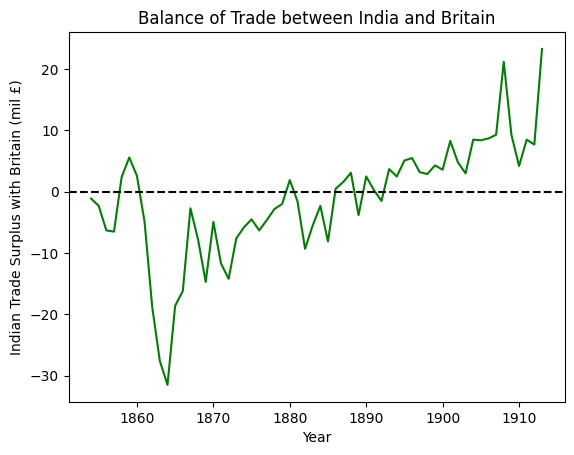

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_3['year'], df_3['Net_Balance'], color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Indian Trade Surplus with Britain (mil £)')
plt.title('Balance of Trade between India and Britain')
plt.show()